<a href="https://colab.research.google.com/github/JigyasaSharma-Tech/Jigyasa/blob/main/Heart_Disease_Prediction_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## **Heart Diseaese Prediction Using Machine Learning**



**Problem Statement:** Heart disease remains one of the leading causes of morbidity and mortality worldwide. Early diagnosis and intervention are crucial in improving patient outcomes and reducing healthcare costs. However, diagnosing heart disease based solely on traditional clinical methods can be challenging, time-consuming, and prone to human error. There is a need for more efficient and accurate diagnostic tools that can assist healthcare professionals in predicting the likelihood of heart disease in patients.

**Objective:** This case study aims to leverage machine learning (ML) techniques to predict the presence or absence of heart disease in patients based on key health parameters such as age, cholesterol levels, blood pressure, chest pain type, exercise-induced angina, and more. By using a dataset containing various patient health features, the goal is to build models that can automatically classify whether a patient has heart disease, providing early alerts for clinicians to take preventive action.

**Data Set**

The dataset contains the following columns:

*   age: Age of the patient
*   sex: Gender of the patient (1 for male, 0 for female).
*   cp: Chest pain type (4 values representing different types).
*   trestbps: Resting blood pressure (in mm Hg).
*   fbs: Fasting blood sugar > 120 mg/dl (1 if true, 0 if false).
*   restecg: Resting electrocardiographic results (values indicate various conditions).
*   thalach: Maximum heart rate achieved.
*   exang: Exercise induced angina (1 if present, 0 if absent).
*   oldpeak: Depression induced by exercise relative to rest.
*   slope: Slope of the peak exercise ST segment.
*   ca: Number of major vessels colored by fluoroscopy.
*   thal: Thalassemia type (3 possible values).
*   target: Presence of heart disease (1 if disease is present, 0 if not).



Key Features:

**Age:** A critical factor, as heart disease risk increases with age.

**Sex:** Gender-based risk variations (males tend to have higher risk).

**Chest pain type (cp):** Type of chest pain, which can give insights into the severity of heart disease.

**Resting blood pressure (trestbps) and serum cholesterol (chol):** Important indicators for cardiovascular health.

**Fasting blood sugar (fbs):** Higher levels are associated with an increased risk of diabetes and heart disease.

**Resting electrocardiographic results (restecg):** The result of the electrocardiogram, providing insights into heart activity.

**Maximum heart rate (thalach):** High levels are usually associated with better cardiovascular health.

**Exercise induced angina (exang):** Indicates whether physical activity induces chest pain, a sign of underlying heart conditions.

**Oldpeak:** Depression caused by exercise, which can be indicative of coronary artery issues.

**Slope:** The slope of the ST segment during peak exercise, which can be used to assess heart function.

**Number of major vessels colored by fluoroscopy (ca)**: Indicates the presence of blockages in the coronary arteries.

**Thalassemia type (thal):** Genetic trait that can impact heart health.


In [ ]:
### Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams #'rcParams'to add styling to the plots
from matplotlib.cm import rainbow #rainbow` for colors.
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sklearn #For implementing Machine Learning

In [ ]:
#To split the available dataset for testing and training
from sklearn.model_selection import train_test_split
#To scale the features
from sklearn.preprocessing import StandardScaler
#For Accuracy and classification
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
#Machine Learning algorithms
from sklearn.linear_model import LogisticRegression #LogisticRegression
from sklearn.neighbors import KNeighborsClassifier #K Neighbors Classifier
from sklearn.svm import SVC #Support Vector Classifier
from sklearn.tree import DecisionTreeClassifier #Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier #Random Forest Classifier

### **Importing Dataset**

In [ ]:
dataset = pd.read_csv('/content/HeartDiseaseData  ML.csv')

In [ ]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
dataset.shape

(303, 14)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### **Data Exploration**

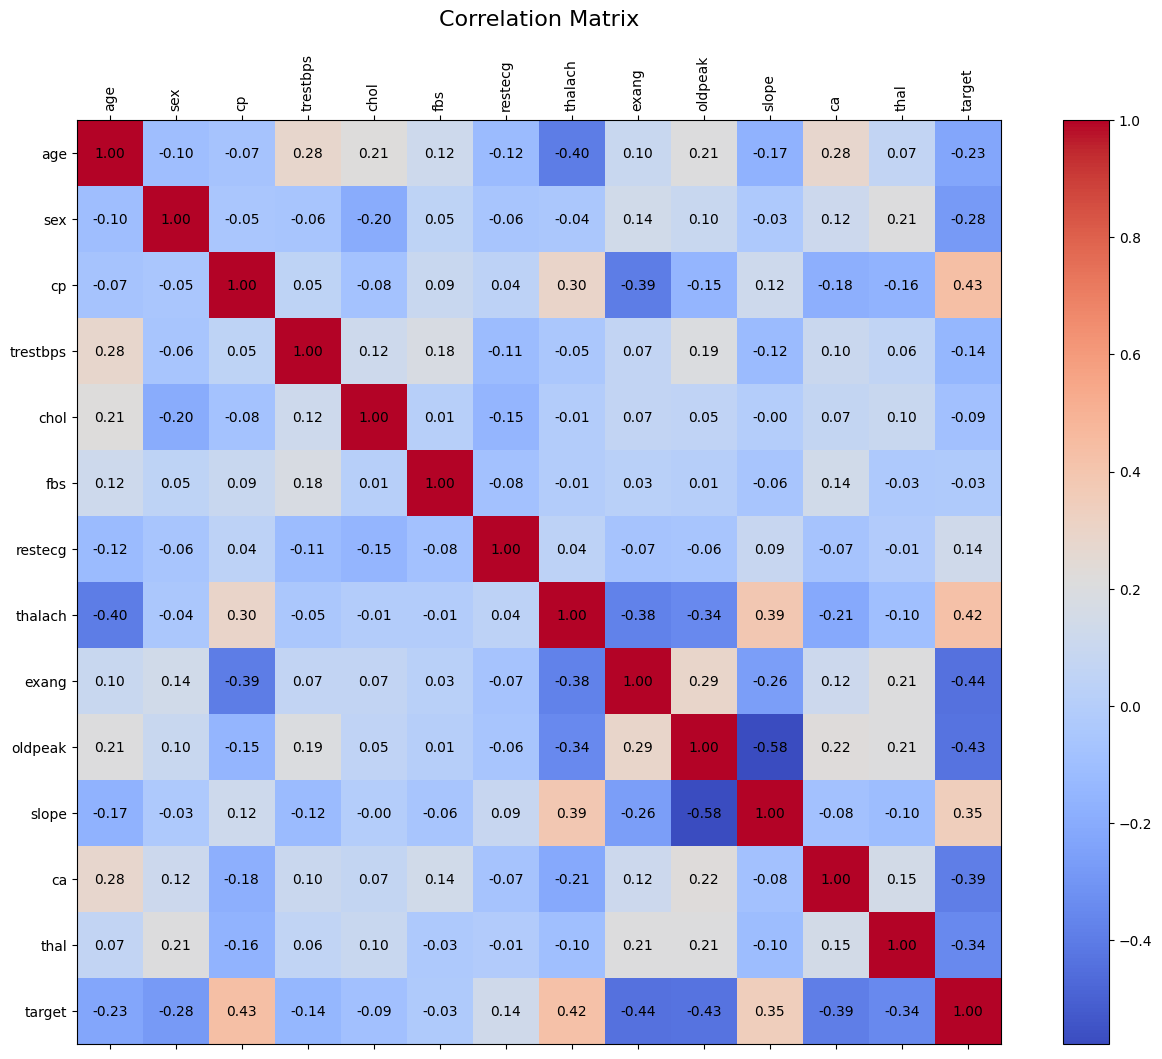

In [ ]:
# Set figure size
plt.figure(figsize=(16, 12)) # figsize should be a tuple (width, height)

# Compute correlation matrix
correlation_matrix = dataset.corr()

# Plot the heatmap
plt.matshow(correlation_matrix, fignum=0, cmap='coolwarm')  # 'coolwarm' for a visually appealing color map

# Add feature labels
plt.xticks(ticks=np.arange(dataset.shape[1]), labels=dataset.columns, rotation=90, fontsize=10)
plt.yticks(ticks=np.arange(dataset.shape[1]), labels=dataset.columns, fontsize=10)

# Annotate each cell with the correlation coefficient
for (i, j), val in np.ndenumerate(correlation_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black', fontsize=10)

# Add a color bar for context
plt.colorbar()

# Add title
plt.title("Correlation Matrix", fontsize=16, pad=20)

# Show the plot
plt.show()

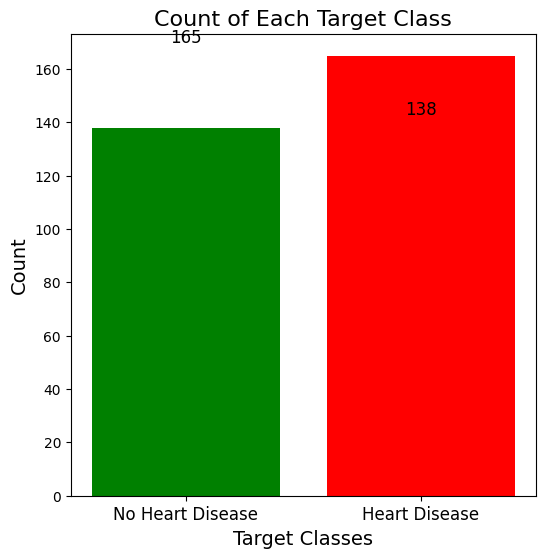

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set figure size
rcParams['figure.figsize'] = 6, 6

# Count target class occurrences
target_counts = dataset['target'].value_counts()

# Plot bar chart
plt.bar(target_counts.index, target_counts.values, color=['red', 'green'])

# Add labels and title
plt.xticks([0, 1], labels=['No Heart Disease', 'Heart Disease'], fontsize=12)
plt.xlabel('Target Classes', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of Each Target Class', fontsize=16)

# Annotate bar heights for clarity
for index, value in enumerate(target_counts.values):
    plt.text(index, value + 5, str(value), ha='center', fontsize=12)

# Display the plot
plt.show()


### **Data Processing**

Converting categorical variables into dummy variables and scale all the values before training the Machine Learning models

The dataset contains categorical variables that need to be converted into numerical format for machine learning models. The method pd.get_dummies() is used to perform one-hot encoding, which creates binary columns for each category in the specified columns (sex, cp, fbs, restecg, exang, slope, ca, thal).

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# One-Hot Encoding with Integer Output
dataset = pd.get_dummies(
    dataset,
    columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'],
    dtype=np.int64
)

In [ ]:
dataset

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


### **Scale the features**

Since the features vary in magnitude (e.g., age in years, cholesterol in mg/dl, heart rate in beats per minute), it's important to scale them so that each feature contributes equally to the model's training process. This is done using StandardScaler, which standardizes the data by removing the mean and scaling it to unit variance.

In [ ]:
# Scaling the Continuous Variables
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])


In [ ]:
dataset

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


### **Machine Learning Implementations**

### **Logistic Regression**
Logistic Regression: A simple linear model used for binary classification. The logistic regression model predicts the probability of an event occurring (heart disease presence in this case).

In [ ]:
# Split the data into features (X) and target (y)
X = dataset.drop('target', axis=1)
y = dataset['target']

In [ ]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a Logistic Regression model
logreg_model = LogisticRegression()

In [ ]:
# Train the model on the training data
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Predict on the test data
y_pred = logreg_model.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression: {accuracy * 100:.2f}%")

Accuracy of Logistic Regression: 88.52%


In [ ]:
# Classification report (precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



### **K Neighbors Classifier**

In [ ]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [ ]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

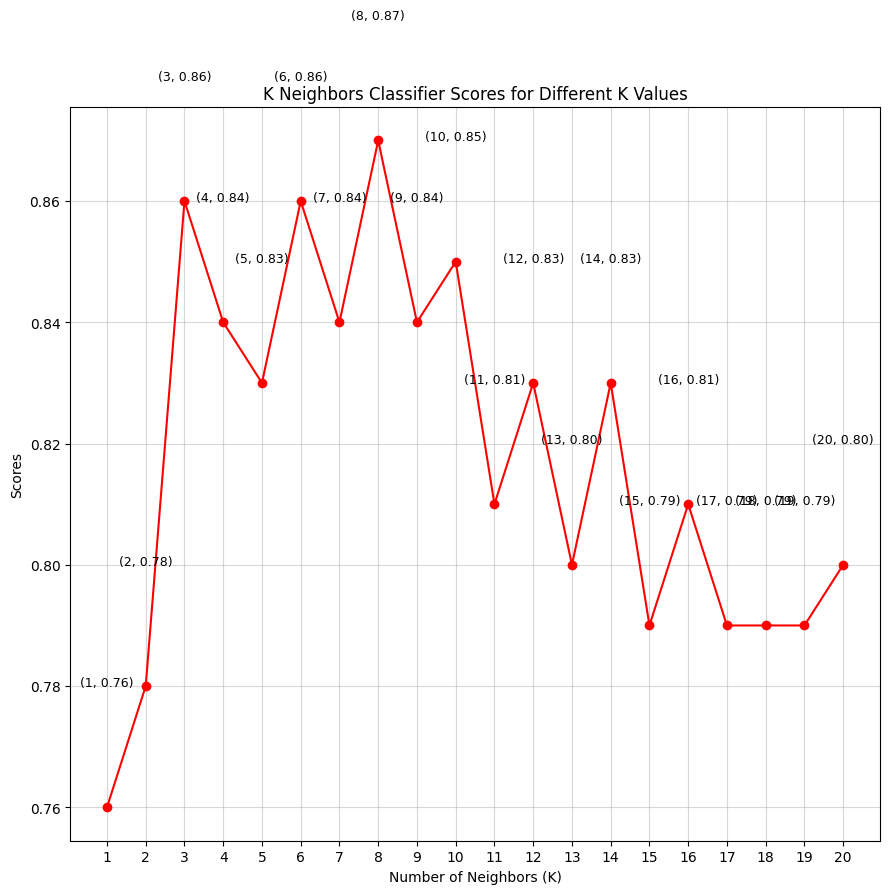

In [ ]:
plt.figure(figsize=(9, 9))  # Adjust figure size for better visibility
plt.plot([k for k in range(1, 21)], knn_scores, color='red', marker='o')
for i in range(1, 21):
    plt.text(
        i,
        knn_scores[i-1] + 0.02,  # Add a slight offset to the y-value to avoid overlap
        f"({i}, {knn_scores[i-1]:.2f})",
        ha='center',
        fontsize=9
    )
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier Scores for Different K Values')
plt.grid(alpha=0.5)  # Add a grid for better readability
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()


In [ ]:
#Maximum score achieved was `0.87` for the 8 neighbors.
print("The score for K Neighbors Classifier is {}% with {} nieghbors.".format(knn_scores[7]*100, 8))

The score for K Neighbors Classifier is 87.0% with 8 nieghbors.


### **Support Vector Classifier**
Support Vector Machine (SVM): A powerful classifier that tries to find the optimal decision boundary between two classes. It can work well with both linear and non-linear data.

In [ ]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

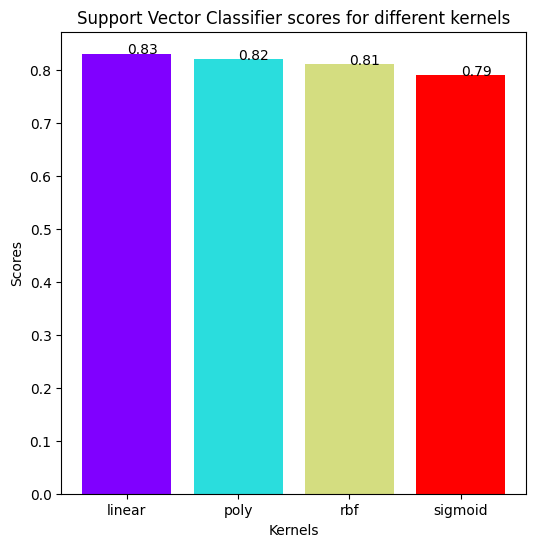

In [ ]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

In [ ]:
#The `linear` kernel performed the best, being slightly better than `rbf` kernel.
print("The score for Support Vector Classifier is {}% with {} kernel.".format(svc_scores[0]*100, 'linear'))

The score for Support Vector Classifier is 83.0% with linear kernel.


### **Decision Tree Classifier**

In [ ]:
#Maximum number of features from 1 to 30 for split
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

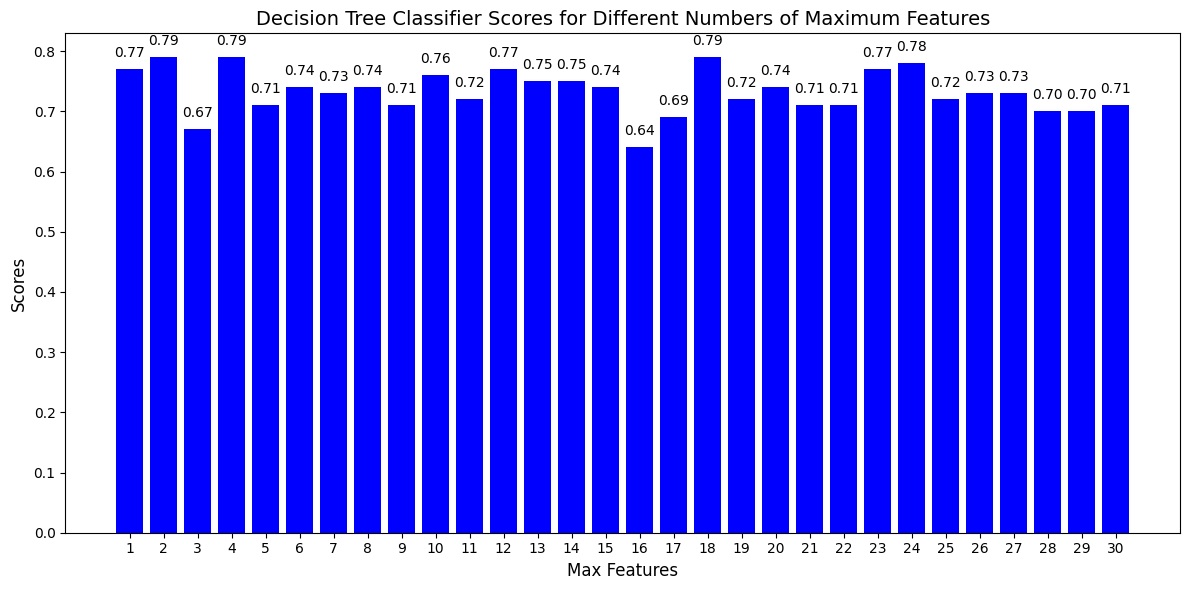

In [ ]:
plt.figure(figsize=(12, 6))

# Plot the bar chart
plt.bar([i for i in range(1, len(X.columns) + 1)], dt_scores, color='blue')

# Add value labels on top of bars
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1] + 0.02, f'{dt_scores[i-1]:.2f}', ha='center', fontsize=10)

# Add axis labels and title
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max Features', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.title('Decision Tree Classifier Scores for Different Numbers of Maximum Features', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()




In [ ]:
#The model achieved the best accuracy at three values of maximum features, `2`, `4` and `18`.
print("The score for Decision Tree Classifier is {}% with {} maximum features.".format(dt_scores[17]*100, [2,4,18]))

The score for Decision Tree Classifier is 79.0% with [2, 4, 18] maximum features.


### **Random Forest**
Random Forest Classifier: An ensemble learning method that creates multiple decision trees and aggregates their results. It is often more accurate and robust than a single decision tree.

In [ ]:
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

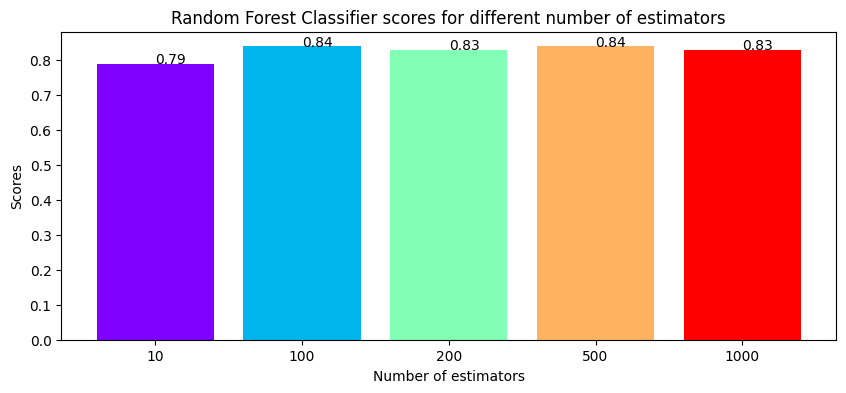

In [ ]:
plt.figure(figsize=(10, 4))
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

In [ ]:
#The maximum score is achieved when the total estimators are 100 or 500.
print("The score for Random Forest Classifier is {}% with {} estimators.".format(rf_scores[1]*100, [100, 500]))

The score for Random Forest Classifier is 84.0% with [100, 500] estimators.


**Results Comparison:**
The performance of all models is compared based on the following metrics:

Accuracy: Measures the proportion of correct predictions.

Precision: The accuracy of positive predictions.

Recall: The ability to capture all actual positive cases.

F1-Score: The harmonic mean of precision and recall.

ROC-AUC: The area under the receiver operating characteristic curve, measuring the model's ability to distinguish between the two classes.


### Conclusion

*   Logistic Regression - 0.88
*   K Neighbors Classifier - 0.87
*   Support Vector Classifier - 0.83
*   Decision Tree Classifier - 0.79
*   Random Forest Classifier - 0.84

Conclusion: `Logistic Regression` achieved the highest score of `88%`